## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [115]:
df = pd.read_csv("QueryResults.csv", names=['DATE', 'TAG', 'POST'], header=0)
df.head()

,DATE,TAG,POST
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [117]:
df.head(6)

,DATE,TAG,POST
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124
5,2008-08-01 00:00:00,perl,28


In [54]:
df.tail(6)

,DATE,TAG,POST
1985,2020-07-01 00:00:00,php,7334
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182
1990,2020-07-01 00:00:00,swift,3607


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [55]:
df.shape

(1991, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [56]:
df.count()

DATE    1991
TAG     1991
POST    1991
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [61]:
df.groupby('TAG').sum('POST').idxmax()

POST    javascript
dtype: object

In [58]:
df.groupby('TAG').count().idxmin()

DATE    go
POST    go
dtype: object

## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

**cek the DATE format type

In [68]:
type(df["DATE"][1])

str

**Turn strint into timestamp in dataframe using to_datetime()

In [69]:
df["DATE"] = pd.to_datetime(df["DATE"])
df.head()

,DATE,TAG,POST
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


## Data Manipulation



**.pivot()** Sometimes you want to convert your DataFrame so that each category has its own column. For example, suppose you needed to take the table below and create a separate column for each actor, where each row is the Age of the actor:

**Mini Challenge** : Can you pivot the df DataFrame so that each row is a date and each column is a programming language? Store the result under a variable called reshaped_df. 

In [92]:
reshaped_df = df.pivot(columns='TAG', index='DATE' , values= 'POST')
reshaped_df = reshaped_df.fillna(0) #replace NAN with 0
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,317.0,2670.0,8954.0,5107.0,181.0,719.0,13253.0,20483.0,215.0,6672.0,26673.0,5761.0,780.0,3434.0
2020-04-01,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-05-01,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0


In [101]:
reshaped_df.isna().values.any()

False

**Mini Challenge** : Examine the dimensions of the reshaped DataFrame. How many rows does it have? How many columns?

In [93]:
reshaped_df.shape

(145, 14)

**Mini Challenge** : Examine the head and the tail of the DataFrame. What does it look like?

In [94]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0


In [95]:
reshaped_df.tail()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2020-03-01,317.0,2670.0,8954.0,5107.0,181.0,719.0,13253.0,20483.0,215.0,6672.0,26673.0,5761.0,780.0,3434.0
2020-04-01,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-05-01,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0
2020-06-01,363.0,2757.0,9064.0,6161.0,214.0,765.0,13015.0,23360.0,203.0,7188.0,31817.0,6249.0,670.0,3733.0
2020-07-01,298.0,2294.0,9145.0,5756.0,212.0,743.0,12723.0,23802.0,182.0,7334.0,31261.0,5694.0,775.0,3607.0


**Mini Challenge:** Print out the column names.

In [120]:
reshaped_df.iloc[:6,:2]

TAG,assembly,c
DATE,,
2008-07-01,0.0,0.0
2008-08-01,8.0,85.0
2008-09-01,28.0,321.0
2008-10-01,15.0,303.0
2008-11-01,17.0,259.0
2008-12-01,18.0,186.0


**Mini Challenge:** Count the number of entries per column.

In [108]:
reshaped_df.sum()

TAG
assembly        34852.0
c              336042.0
c#            1423530.0
c++            684210.0
delphi          46212.0
go              47499.0
java          1696403.0
javascript    2056510.0
perl            65286.0
php           1361988.0
python        1496210.0
r              356799.0
ruby           214582.0
swift          273055.0
dtype: float64

## Data Visualisaton with with Matplotlib


In [118]:
pip install matplotlib

     ---------------------------------------- 7.2/7.2 MB 606.1 kB/s eta 0:00:00
     ------------------------------------ 163.6/163.6 kB 891.4 kB/s eta 0:00:00
     ------------------------------------ 965.4/965.4 kB 605.3 kB/s eta 0:00:00
     -------------------------------------- 55.4/55.4 kB 716.7 kB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 402.8 kB/s eta 0:00:00
     -------------------------------------- 98.3/98.3 kB 332.4 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [121]:
import matplotlib.pyplot as plt

**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

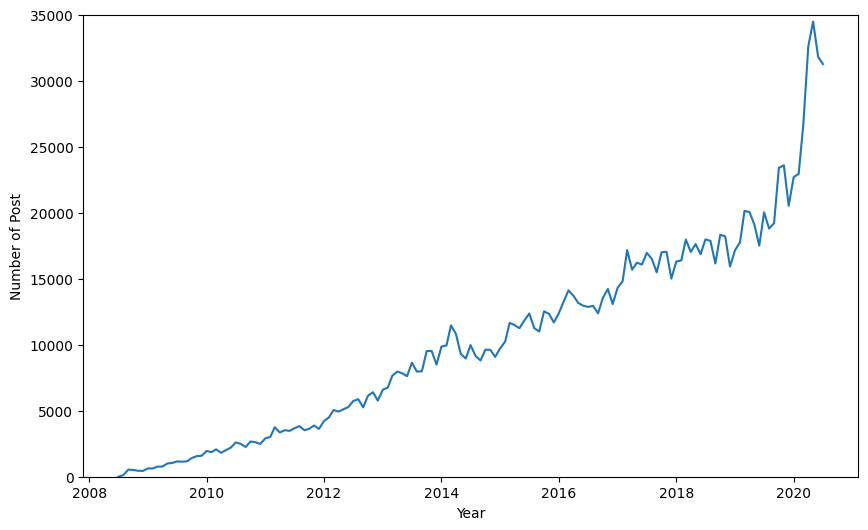

In [139]:
#configure the picture
plt.figure(figsize=(10,6))
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.ylabel('Number of Post', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylim(0,35000)
plt.plot(reshaped_df['python'])

**Multipleplot**

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

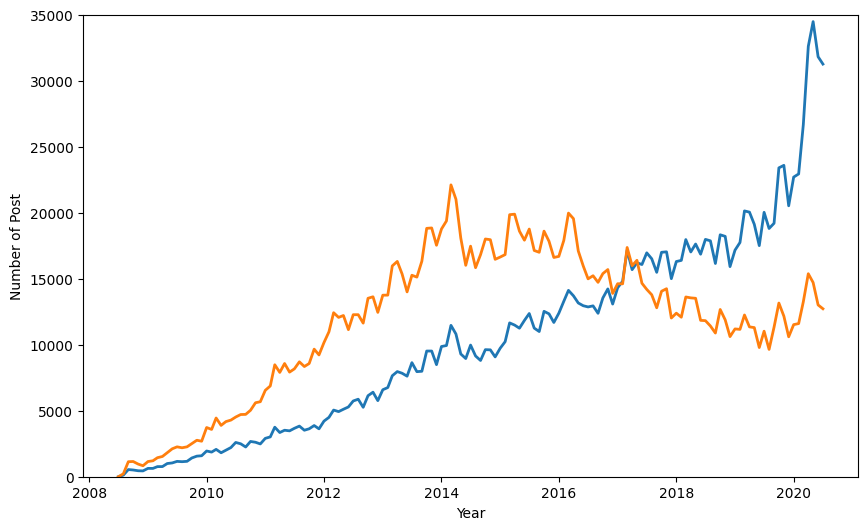

In [141]:
#configure the picture
plt.figure(figsize=(10,6))
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.ylabel('Number of Post', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylim(0,35000)

plt.plot(reshaped_df.index, reshaped_df['python'], linewidth =2, label=reshaped_df['python'].name)
plt.plot(reshaped_df.index, reshaped_df['java'], linewidth =2, label=reshaped_df['java'].name)

**Cretae plot with whole data**

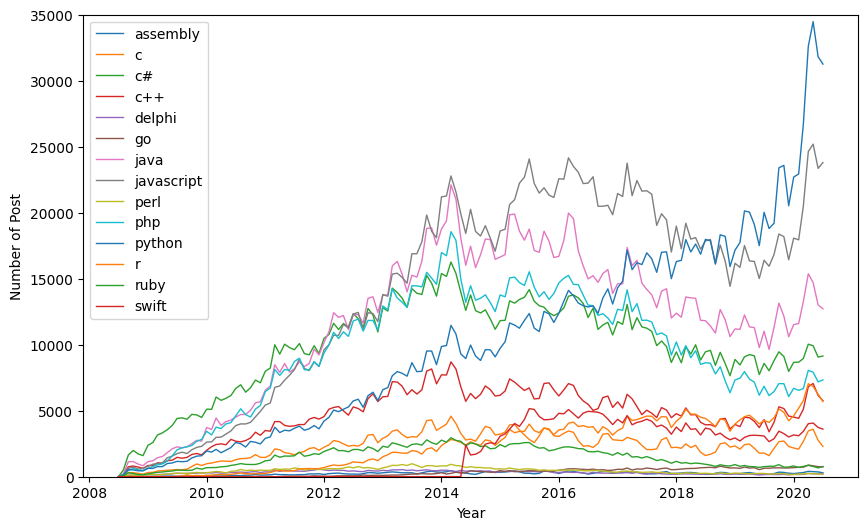

In [144]:
#configure the picture
plt.figure(figsize=(10,6))
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.ylabel('Number of Post', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylim(0,35000)

for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], linewidth =1, label=reshaped_df[column].name)

plt.legend(fontsize=10)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

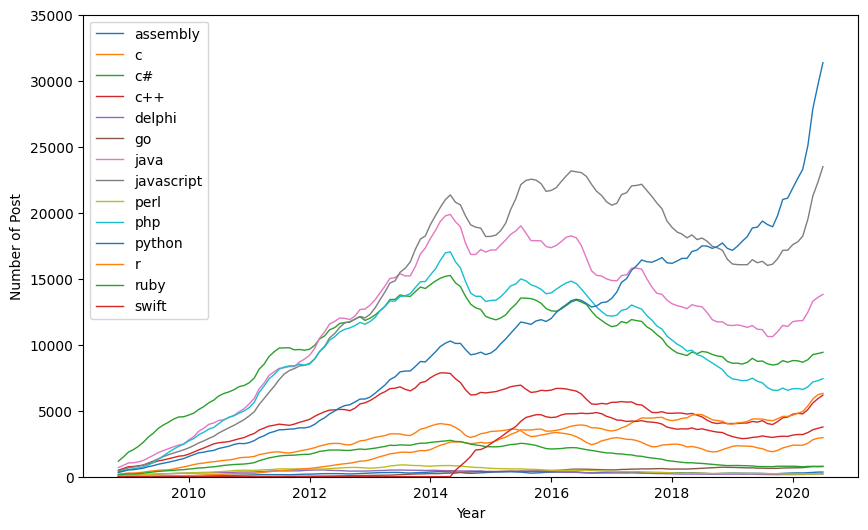

In [150]:
#smoothing
roll_df = reshaped_df.rolling(window=5).mean()

#configure the picture
plt.figure(figsize=(10,6))
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.ylabel('Number of Post', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylim(0,35000)

for column in reshaped_df.columns:
    plt.plot(roll_df.index, roll_df[column], linewidth =1, label=roll_df[column].name)

plt.legend(fontsize=10)

# Learning Points and Summary

Congratulations on completing another challenging data science project! Today we've seen how to grab some raw data and create some interesting charts using Pandas and Matplotlib. We've

1. used .groupby() to explore the number of posts and entries per programming language

2. converted strings to Datetime objects with to_datetime() for easier plotting

3. reshaped our DataFrame by converting categories to columns using .pivot()

4. used .count() and isna().values.any() to look for NaN values in our DataFrame, which we then replaced using .fillna()

5. created (multiple) line charts using .plot() with a for-loop

6. styled our charts by changing the size, the labels, and the upper and lower bounds of our axis.

7. added a legend to tell apart which line is which by colour

8. smoothed out our time-series observations with .rolling().mean() and plotted them to better identify trends over time.



Well done for completing today's lessons! Have a good rest. I'll see you tomorrow!